In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
# 한글, 마이너스 깨지는 것 방지
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 데이터 정보
- 인총 주택 정보 데이터(2015~2017) : 전국
- 인총 가구 정보 데이터(2015~2017) : 전국

In [2]:
"""
path = '인총 주택 정보 데이터_2015.txt'
with open(path, 'r', encoding='utf-16') as f:
    lines  = f.readlines()
    
path = '서울시 주민등록인구 (동별) 통계_2015_2017.txt'
with open(path, 'r', encoding='utf-8') as f:
    lines  = f.readlines()
"""

"\npath = '인총 주택 정보 데이터_2015.txt'\nwith open(path, 'r', encoding='utf-16') as f:\n    lines  = f.readlines()\n    \npath = '서울시 주민등록인구 (동별) 통계_2015_2017.txt'\nwith open(path, 'r', encoding='utf-8') as f:\n    lines  = f.readlines()\n"

In [3]:
"""
# TXT to CSV
total = pd.read_csv('인총 주택 정보 데이터_2015.txt', delimiter='\t', encoding='utf-16')

resident = pd.read_csv('서울시 주민등록인구 (동별) 통계_2015_2017.txt', delimiter='\t', encoding='utf-8')
"""

"\n# TXT to CSV\ntotal = pd.read_csv('인총 주택 정보 데이터_2015.txt', delimiter='\t', encoding='utf-16')\n\nresident = pd.read_csv('서울시 주민등록인구 (동별) 통계_2015_2017.txt', delimiter='\t', encoding='utf-8')\n"

In [4]:
"""
# Save to CSV
total.to_csv('인총 주택 정보 데이터_2015.csv', index=False)

resident.to_csv('서울시 주민등록인구 (동별) 통계_2015_2017.csv', index=False)
"""

"\n# Save to CSV\ntotal.to_csv('인총 주택 정보 데이터_2015.csv', index=False)\n\nresident.to_csv('서울시 주민등록인구 (동별) 통계_2015_2017.csv', index=False)\n"

## 1. 데이터 전처리

### 1.1 전국 주택 정보 데이터

In [5]:
total = pd.read_csv('인총 주택 정보 데이터_2015.csv')
total

,STDYY,CSOPAR_CODE,ADSTRD_CODE,ATPT_NM,SIGNGU_NM,ADSTRD_NM,TOT_HOUSE_CO,MLPXHOU_CO,SLH_HOS,APT_CO,...,PD_3OVER_4BELO_HOUSE_CO,PD_4OVER_5BELO_HOUSE_CO,PD_5OVER_10BELO_HOUSE_CO,PD_10OVER_15BELO_HOUSE_CO,PD_15OVER_20BELO_HOUSE_CO,PD_20OVER_30BELO_HOUSE_CO,PD_30OVER_40BELO_HOUSE_CO,PD_40OVER_50BELO_HOUSE_CO,PD_50ABOVE_HOUSE_CO,NON_SMGU_HOUSE_CO
0,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,128,19,81,0,...,19,0,0,18,13,13,0,5,48,0
1,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,210,138,16,8,...,0,0,0,133,65,0,0,0,0,0
2,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,143,35,104,0,...,0,0,8,26,13,16,5,20,54,0
3,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,157,127,29,0,...,0,0,0,11,105,5,0,0,22,0
4,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,127,97,6,0,...,0,0,0,27,93,0,0,0,0,0
5,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,142,10,132,0,...,0,0,0,0,0,13,27,31,65,0
6,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,162,68,8,0,...,0,0,11,32,105,10,0,0,0,0
7,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,175,32,70,45,...,0,0,11,38,46,32,7,14,22,0
8,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,107,39,51,15,...,0,0,16,17,26,11,5,0,25,0
9,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,180,114,35,0,...,0,0,0,82,60,0,0,0,26,0


In [6]:
total

,STDYY,CSOPAR_CODE,ADSTRD_CODE,ATPT_NM,SIGNGU_NM,ADSTRD_NM,TOT_HOUSE_CO,MLPXHOU_CO,SLH_HOS,APT_CO,...,PD_3OVER_4BELO_HOUSE_CO,PD_4OVER_5BELO_HOUSE_CO,PD_5OVER_10BELO_HOUSE_CO,PD_10OVER_15BELO_HOUSE_CO,PD_15OVER_20BELO_HOUSE_CO,PD_20OVER_30BELO_HOUSE_CO,PD_30OVER_40BELO_HOUSE_CO,PD_40OVER_50BELO_HOUSE_CO,PD_50ABOVE_HOUSE_CO,NON_SMGU_HOUSE_CO
0,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,128,19,81,0,...,19,0,0,18,13,13,0,5,48,0
1,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,210,138,16,8,...,0,0,0,133,65,0,0,0,0,0
2,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,143,35,104,0,...,0,0,8,26,13,16,5,20,54,0
3,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,157,127,29,0,...,0,0,0,11,105,5,0,0,22,0
4,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,127,97,6,0,...,0,0,0,27,93,0,0,0,0,0
5,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,142,10,132,0,...,0,0,0,0,0,13,27,31,65,0
6,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,162,68,8,0,...,0,0,11,32,105,10,0,0,0,0
7,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,175,32,70,45,...,0,0,11,38,46,32,7,14,22,0
8,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,107,39,51,15,...,0,0,16,17,26,11,5,0,25,0
9,2015,1.101070e+12,1111051500,서울,종로구,청운효자동,180,114,35,0,...,0,0,0,82,60,0,0,0,26,0


In [7]:
# 컬럼명 변경
total.columns = ['기준년','집계구코드','행정동코드','시도명','시군구명','행정동명',
                '총주택수','다세대주택수','단독주택수','아파트수','연립주택수','영업용건물내주택수','주택이외거처수',
                '면적20이하','면적20이상40이하','면적40이상60이하','면적60이상85이하','면적85이상100이하','면적100이상130이하','면적130이상165이하','면적165이상230이하','면적230초과',
                '기간1년미만','기간1년이상2년미만','기간2년이상3년미만','기간3년이상4년미만','기간4년이상5년미만','기간5년이상10년미만',
                 '기간10년이상15년미만','기간15년이상20년미만','기간20년이상30년미만','기간30년이상40년미만','기간40년이상50년미만','기간50년이상','자료없는집계구']
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311970 entries, 0 to 311969
Data columns (total 35 columns):
기준년             311970 non-null int64
집계구코드           311970 non-null float64
행정동코드           311970 non-null int64
시도명             311970 non-null object
시군구명            311970 non-null object
행정동명            311970 non-null object
총주택수            311970 non-null int64
다세대주택수          311970 non-null int64
단독주택수           311970 non-null int64
아파트수            311970 non-null int64
연립주택수           311970 non-null int64
영업용건물내주택수       311970 non-null int64
주택이외거처수         311970 non-null int64
면적20이하          311970 non-null int64
면적20이상40이하      311970 non-null int64
면적40이상60이하      311970 non-null int64
면적60이상85이하      311970 non-null int64
면적85이상100이하     311970 non-null int64
면적100이상130이하    311970 non-null int64
면적130이상165이하    311970 non-null int64
면적165이상230이하    311970 non-null int64
면적230초과         311970 non-null int64
기간1년미만          311970 non-null int64
기간1년이상2년미만

In [8]:
# 특정 열 추출
total = total.iloc[:, [0,3,4,6,7,8,9,10,11,12]]
total

,기준년,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수
0,2015,서울,종로구,128,19,81,0,19,9,9
1,2015,서울,종로구,210,138,16,8,48,0,0
2,2015,서울,종로구,143,35,104,0,0,0,0
3,2015,서울,종로구,157,127,29,0,0,0,0
4,2015,서울,종로구,127,97,6,0,24,0,0
5,2015,서울,종로구,142,10,132,0,0,0,0
6,2015,서울,종로구,162,68,8,0,86,0,0
7,2015,서울,종로구,175,32,70,45,27,0,0
8,2015,서울,종로구,107,39,51,15,0,0,0
9,2015,서울,종로구,180,114,35,0,31,0,0


In [9]:
# 데이터타입 변환
# 범주형 변수 타입 변환 - category
total['기준년'] = total['기준년'].astype(str)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311970 entries, 0 to 311969
Data columns (total 10 columns):
기준년          311970 non-null object
시도명          311970 non-null object
시군구명         311970 non-null object
총주택수         311970 non-null int64
다세대주택수       311970 non-null int64
단독주택수        311970 non-null int64
아파트수         311970 non-null int64
연립주택수        311970 non-null int64
영업용건물내주택수    311970 non-null int64
주택이외거처수      311970 non-null int64
dtypes: int64(7), object(3)
memory usage: 23.8+ MB


In [10]:
# 연도별 나누기
total15 = total[total['기준년'] == '2015']
total16 = total[total['기준년'] == '2016']
total17 = total[total['기준년'] == '2017']

In [11]:
total15

,기준년,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수
0,2015,서울,종로구,128,19,81,0,19,9,9
1,2015,서울,종로구,210,138,16,8,48,0,0
2,2015,서울,종로구,143,35,104,0,0,0,0
3,2015,서울,종로구,157,127,29,0,0,0,0
4,2015,서울,종로구,127,97,6,0,24,0,0
5,2015,서울,종로구,142,10,132,0,0,0,0
6,2015,서울,종로구,162,68,8,0,86,0,0
7,2015,서울,종로구,175,32,70,45,27,0,0
8,2015,서울,종로구,107,39,51,15,0,0,0
9,2015,서울,종로구,180,114,35,0,31,0,0


In [12]:
# 시도/시군구별 주택수 평균
t_si15 = total15.groupby(['시도명','시군구명'], as_index=False).mean()
t_si16 = total16.groupby(['시도명','시군구명'], as_index=False).mean()
t_si17 = total17.groupby(['시도명','시군구명'], as_index=False).mean()
t_si15

,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수
0,강원,강릉시,156.828508,1.895323,60.741648,85.953229,4.677060,2.683742,2.536748
1,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873
2,강원,동해시,165.025510,3.969388,51.454082,100.551020,6.005102,2.535714,2.515306
3,강원,삼척시,162.044872,3.448718,82.147436,67.660256,5.993590,1.942308,2.942308
4,강원,속초시,163.245714,2.051429,46.560000,106.074286,5.560000,2.440000,5.297143
5,강원,양구군,165.659091,3.159091,104.568182,45.000000,7.818182,4.090909,5.636364
6,강원,양양군,159.475410,2.196721,111.295082,33.278689,6.868852,4.803279,5.327869
7,강원,영월군,189.539474,7.934211,132.236842,37.855263,7.328947,3.052632,4.842105
8,강원,원주시,152.934498,1.072780,40.493450,108.094614,1.430859,1.381368,2.419214
9,강원,인제군,177.800000,4.366667,117.033333,42.000000,8.150000,5.200000,4.866667


### 1.2 전국 가구 정보 데이터

In [13]:
home = pd.read_csv('인총 가구 정보 데이터.csv')
home

,﻿STDYY,CSOPAR_CODE,ADSTRD_CODE,ATPT_NM,SIGNGU_NM,ADSTRD_NM,TOT_HSHLD_CO,AVRG_MBHS_CO,ONE_GEN_HSHLD_CO,TWO_GEN_HSHLD_CO,THREE_GEN_HSHLD_CO,FOUR_GEN_HSHLD_CO,ONE_PERSON_HSHLD_CO,NON_BLD_HSHLD_CO
0,2015,1101072010001,1111051500,서울,종로구,청운효자동,225,2.2,34,74,20,0,94,0
1,2015,1101072010002,1111051500,서울,종로구,청운효자동,227,2.5,29,116,11,0,69,0
2,2015,1101072010003,1111051500,서울,종로구,청운효자동,245,2.2,33,100,14,0,92,6
3,2015,1101072010004,1111051500,서울,종로구,청운효자동,171,2.5,30,80,9,0,47,5
4,2015,1101072010005,1111051500,서울,종로구,청운효자동,134,2.8,15,81,8,0,28,0
5,2015,1101072010006,1111051500,서울,종로구,청운효자동,184,2.7,25,94,11,0,50,0
6,2015,1101072010007,1111051500,서울,종로구,청운효자동,171,2.7,25,94,15,0,37,0
7,2015,1101072010008,1111051500,서울,종로구,청운효자동,210,3.0,36,118,21,0,30,5
8,2015,1101072010009,1111051500,서울,종로구,청운효자동,155,2.8,19,90,15,0,29,0
9,2015,1101072010010,1111051500,서울,종로구,청운효자동,202,2.5,22,105,14,0,55,6


In [14]:
# 컬럼명 변경
home.columns = ['기준년','집계구코드','행정동코드','시도명','시군구명','행정동명',
                '총가구수','평균가구원수','1세대가구수','2세대가구수','3세대가구수','4세대가구수',
                '1인가구수','비혈연가구수']
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311970 entries, 0 to 311969
Data columns (total 14 columns):
기준년       311970 non-null int64
집계구코드     311970 non-null int64
행정동코드     311970 non-null int64
시도명       311970 non-null object
시군구명      311970 non-null object
행정동명      311970 non-null object
총가구수      311970 non-null int64
평균가구원수    311970 non-null float64
1세대가구수    311970 non-null int64
2세대가구수    311970 non-null int64
3세대가구수    311970 non-null int64
4세대가구수    311970 non-null int64
1인가구수     311970 non-null int64
비혈연가구수    311970 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ MB


In [15]:
# 필요없는 컬럼 제거
col = ['집계구코드','행정동코드','행정동명']
home = home.drop(col, axis='columns')
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311970 entries, 0 to 311969
Data columns (total 11 columns):
기준년       311970 non-null int64
시도명       311970 non-null object
시군구명      311970 non-null object
총가구수      311970 non-null int64
평균가구원수    311970 non-null float64
1세대가구수    311970 non-null int64
2세대가구수    311970 non-null int64
3세대가구수    311970 non-null int64
4세대가구수    311970 non-null int64
1인가구수     311970 non-null int64
비혈연가구수    311970 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 26.2+ MB


In [16]:
# 데이터타입 변환
# 범주형 변수 타입 변환 - category
home['기준년'] = home['기준년'].astype(str)
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311970 entries, 0 to 311969
Data columns (total 11 columns):
기준년       311970 non-null object
시도명       311970 non-null object
시군구명      311970 non-null object
총가구수      311970 non-null int64
평균가구원수    311970 non-null float64
1세대가구수    311970 non-null int64
2세대가구수    311970 non-null int64
3세대가구수    311970 non-null int64
4세대가구수    311970 non-null int64
1인가구수     311970 non-null int64
비혈연가구수    311970 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 26.2+ MB


In [17]:
# 연도별 나누기
home15 = home[home['기준년'] == '2015']
home16 = home[home['기준년'] == '2016']
home17 = home[home['기준년'] == '2017']

In [18]:
home15

,기준년,시도명,시군구명,총가구수,평균가구원수,1세대가구수,2세대가구수,3세대가구수,4세대가구수,1인가구수,비혈연가구수
0,2015,서울,종로구,225,2.2,34,74,20,0,94,0
1,2015,서울,종로구,227,2.5,29,116,11,0,69,0
2,2015,서울,종로구,245,2.2,33,100,14,0,92,6
3,2015,서울,종로구,171,2.5,30,80,9,0,47,5
4,2015,서울,종로구,134,2.8,15,81,8,0,28,0
5,2015,서울,종로구,184,2.7,25,94,11,0,50,0
6,2015,서울,종로구,171,2.7,25,94,15,0,37,0
7,2015,서울,종로구,210,3.0,36,118,21,0,30,5
8,2015,서울,종로구,155,2.8,19,90,15,0,29,0
9,2015,서울,종로구,202,2.5,22,105,14,0,55,6


In [19]:
# 시도/시군구별 가구원수 평균
h_si15 = home15.groupby(['시도명','시군구명'], as_index=False).mean()
h_si16 = home16.groupby(['시도명','시군구명'], as_index=False).mean()
h_si17 = home17.groupby(['시도명','시군구명'], as_index=False).mean()
h_si15

,시도명,시군구명,총가구수,평균가구원수,1세대가구수,2세대가구수,3세대가구수,4세대가구수,1인가구수,비혈연가구수
0,강원,강릉시,193.623608,2.282405,38.077951,80.474388,10.307350,0.00000,62.218263,0.908686
1,강원,고성군,173.422535,1.690141,37.169014,52.352113,10.323944,0.00000,70.746479,1.323944
2,강원,동해시,182.423469,2.316327,39.015306,82.219388,8.831633,0.00000,49.663265,1.025510
3,강원,삼척시,184.948718,2.082692,40.429487,67.416667,8.801282,0.00000,64.269231,2.467949
4,강원,속초시,186.622857,2.292571,36.725714,80.125714,9.742857,0.00000,56.445714,1.920000
5,강원,양구군,207.909091,2.288636,39.590909,75.590909,12.340909,0.00000,75.090909,3.159091
6,강원,양양군,182.098361,1.922951,44.573770,63.000000,10.704918,0.00000,60.426230,1.754098
7,강원,영월군,209.447368,2.182895,55.986842,69.789474,10.789474,0.00000,69.263158,2.000000
8,강원,원주시,185.000000,2.442940,31.986900,87.508006,9.519651,0.00000,53.659389,0.797671
9,강원,인제군,214.333333,2.295000,43.033333,79.033333,13.116667,0.00000,74.533333,2.850000


## 2. 데이터 합치기

In [20]:
merge15 = pd.merge(t_si15, h_si15, how='outer', on='시군구명')
merge16 = pd.merge(t_si16, h_si16, how='outer', on='시군구명')
merge17 = pd.merge(t_si17, h_si17, how='outer', on='시군구명')
merge15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 18 columns):
시도명_x        366 non-null object
시군구명         366 non-null object
총주택수         366 non-null float64
다세대주택수       366 non-null float64
단독주택수        366 non-null float64
아파트수         366 non-null float64
연립주택수        366 non-null float64
영업용건물내주택수    366 non-null float64
주택이외거처수      366 non-null float64
시도명_y        366 non-null object
총가구수         366 non-null float64
평균가구원수       366 non-null float64
1세대가구수       366 non-null float64
2세대가구수       366 non-null float64
3세대가구수       366 non-null float64
4세대가구수       366 non-null float64
1인가구수        366 non-null float64
비혈연가구수       366 non-null float64
dtypes: float64(15), object(3)
memory usage: 54.3+ KB


In [21]:
# 필요없는 컬럼 제거
merge15.drop(['시도명_y'], axis='columns', inplace=True)
merge16.drop(['시도명_y'], axis='columns', inplace=True)
merge17.drop(['시도명_y'], axis='columns', inplace=True)

# 컬럼명 변경
merge15 = merge15.rename({'시도명_x':'시도명'}, axis='columns')
merge16 = merge16.rename({'시도명_x':'시도명'}, axis='columns')
merge17 = merge17.rename({'시도명_x':'시도명'}, axis='columns')

merge15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 17 columns):
시도명          366 non-null object
시군구명         366 non-null object
총주택수         366 non-null float64
다세대주택수       366 non-null float64
단독주택수        366 non-null float64
아파트수         366 non-null float64
연립주택수        366 non-null float64
영업용건물내주택수    366 non-null float64
주택이외거처수      366 non-null float64
총가구수         366 non-null float64
평균가구원수       366 non-null float64
1세대가구수       366 non-null float64
2세대가구수       366 non-null float64
3세대가구수       366 non-null float64
4세대가구수       366 non-null float64
1인가구수        366 non-null float64
비혈연가구수       366 non-null float64
dtypes: float64(15), object(2)
memory usage: 51.5+ KB


In [22]:
# 기준연도 추가
merge15['기준년'] = '2015'
merge16['기준년'] = '2016'
merge17['기준년'] = '2017'
merge15

,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수,총가구수,평균가구원수,1세대가구수,2세대가구수,3세대가구수,4세대가구수,1인가구수,비혈연가구수,기준년
0,강원,강릉시,156.828508,1.895323,60.741648,85.953229,4.677060,2.683742,2.536748,193.623608,2.282405,38.077951,80.474388,10.307350,0.00000,62.218263,0.908686,2015
1,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.422535,1.690141,37.169014,52.352113,10.323944,0.00000,70.746479,1.323944,2015
2,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.804688,1.897656,41.007812,60.789062,9.851562,0.00000,58.890625,1.664062,2015
3,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.422535,1.690141,37.169014,52.352113,10.323944,0.00000,70.746479,1.323944,2015
4,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.804688,1.897656,41.007812,60.789062,9.851562,0.00000,58.890625,1.664062,2015
5,강원,동해시,165.025510,3.969388,51.454082,100.551020,6.005102,2.535714,2.515306,182.423469,2.316327,39.015306,82.219388,8.831633,0.00000,49.663265,1.025510,2015
6,강원,삼척시,162.044872,3.448718,82.147436,67.660256,5.993590,1.942308,2.942308,184.948718,2.082692,40.429487,67.416667,8.801282,0.00000,64.269231,2.467949,2015
7,강원,속초시,163.245714,2.051429,46.560000,106.074286,5.560000,2.440000,5.297143,186.622857,2.292571,36.725714,80.125714,9.742857,0.00000,56.445714,1.920000,2015
8,강원,양구군,165.659091,3.159091,104.568182,45.000000,7.818182,4.090909,5.636364,207.909091,2.288636,39.590909,75.590909,12.340909,0.00000,75.090909,3.159091,2015
9,강원,양양군,159.475410,2.196721,111.295082,33.278689,6.868852,4.803279,5.327869,182.098361,1.922951,44.573770,63.000000,10.704918,0.00000,60.426230,1.754098,2015


In [23]:
result = pd.concat([merge15, merge16, merge17])
result

,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수,총가구수,평균가구원수,1세대가구수,2세대가구수,3세대가구수,4세대가구수,1인가구수,비혈연가구수,기준년
0,강원,강릉시,156.828508,1.895323,60.741648,85.953229,4.677060,2.683742,2.536748,193.623608,2.282405,38.077951,80.474388,10.307350,0.0,62.218263,0.908686,2015
1,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.422535,1.690141,37.169014,52.352113,10.323944,0.0,70.746479,1.323944,2015
2,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.804688,1.897656,41.007812,60.789062,9.851562,0.0,58.890625,1.664062,2015
3,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.422535,1.690141,37.169014,52.352113,10.323944,0.0,70.746479,1.323944,2015
4,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.804688,1.897656,41.007812,60.789062,9.851562,0.0,58.890625,1.664062,2015
5,강원,동해시,165.025510,3.969388,51.454082,100.551020,6.005102,2.535714,2.515306,182.423469,2.316327,39.015306,82.219388,8.831633,0.0,49.663265,1.025510,2015
6,강원,삼척시,162.044872,3.448718,82.147436,67.660256,5.993590,1.942308,2.942308,184.948718,2.082692,40.429487,67.416667,8.801282,0.0,64.269231,2.467949,2015
7,강원,속초시,163.245714,2.051429,46.560000,106.074286,5.560000,2.440000,5.297143,186.622857,2.292571,36.725714,80.125714,9.742857,0.0,56.445714,1.920000,2015
8,강원,양구군,165.659091,3.159091,104.568182,45.000000,7.818182,4.090909,5.636364,207.909091,2.288636,39.590909,75.590909,12.340909,0.0,75.090909,3.159091,2015
9,강원,양양군,159.475410,2.196721,111.295082,33.278689,6.868852,4.803279,5.327869,182.098361,1.922951,44.573770,63.000000,10.704918,0.0,60.426230,1.754098,2015


## 3. EDA

### 3.1 범주형변수 분포 확인

In [24]:
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [25]:
result.info() #범주형 : 기준연도, 시도명, 시군구명

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 365
Data columns (total 18 columns):
시도명          1098 non-null object
시군구명         1098 non-null object
총주택수         1098 non-null float64
다세대주택수       1098 non-null float64
단독주택수        1098 non-null float64
아파트수         1098 non-null float64
연립주택수        1098 non-null float64
영업용건물내주택수    1098 non-null float64
주택이외거처수      1098 non-null float64
총가구수         1098 non-null float64
평균가구원수       1098 non-null float64
1세대가구수       1098 non-null float64
2세대가구수       1098 non-null float64
3세대가구수       1098 non-null float64
4세대가구수       1098 non-null float64
1인가구수        1098 non-null float64
비혈연가구수       1098 non-null float64
기준년          1098 non-null object
dtypes: float64(15), object(3)
memory usage: 163.0+ KB


In [26]:
result = result[['기준년','시도명', '시군구명', '총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수',
       '주택이외거처수', '총가구수', '평균가구원수', '1세대가구수', '2세대가구수', '3세대가구수', '4세대가구수', '1인가구수', '비혈연가구수']]

In [27]:
result.columns

Index(['기준년', '시도명', '시군구명', '총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수',
       '영업용건물내주택수', '주택이외거처수', '총가구수', '평균가구원수', '1세대가구수', '2세대가구수', '3세대가구수',
       '4세대가구수', '1인가구수', '비혈연가구수'],
      dtype='object')

In [28]:
# 범주형, 수치형 변수 분리
df_cat,df_num = result.iloc[:,0:3], result.iloc[:,3:]
df_cat.columns

Index(['기준년', '시도명', '시군구명'], dtype='object')

In [29]:
df_cat_tmp=(df_cat.melt().groupby(['variable','value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum')))).reset_index()
df_cat_tmp

,variable,value,count,proportion
0,기준년,2015,366,0.333333
1,기준년,2016,366,0.333333
2,기준년,2017,366,0.333333
3,시군구명,가평군,3,0.002732
4,시군구명,강남구,3,0.002732
5,시군구명,강동구,3,0.002732
6,시군구명,강릉시,3,0.002732
7,시군구명,강북구,3,0.002732
8,시군구명,강서구,12,0.010929
9,시군구명,강진군,3,0.002732


In [30]:
sido = df_cat_tmp[df_cat_tmp['variable'] == '시도명']
sigu = df_cat_tmp[df_cat_tmp['variable'] == '시군구명']
sido

,variable,value,count,proportion
230,시도명,강원,57,0.051913
231,시도명,경기,126,0.114754
232,시도명,경남,69,0.062842
233,시도명,경북,72,0.065574
234,시도명,광주,63,0.057377
235,시도명,대구,87,0.079235
236,시도명,대전,57,0.051913
237,시도명,부산,114,0.103825
238,시도명,서울,93,0.084699
239,시도명,세종,3,0.002732


In [31]:
sido['value'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

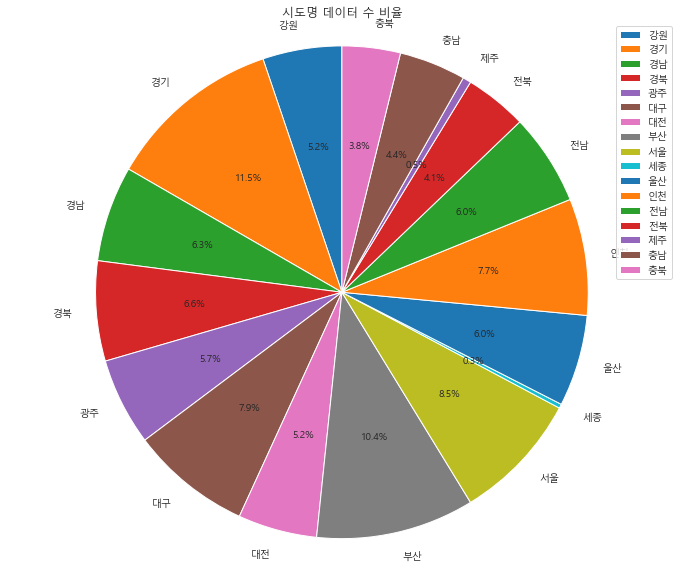

In [32]:
# 시도명 데이터 비율 - pie chart
fig, ax = plt.subplots(1,1, figsize = (12,10))

labels = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산','인천', '전남', '전북', '제주', '충남', '충북']
ratio = [57, 126,  69,  72,  63,  87, 57, 114,  93,   3,  66,  84, 66, 45, 6, 48,  42]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('시도명 데이터 수 비율')
plt.legend(labels)
plt.axis('equal')
plt.show()

세종시, 제주시를 제외하고 대체로 데이터가 고르게 분포되어 있음

In [33]:
sigu

,variable,value,count,proportion
3,시군구명,가평군,3,0.002732
4,시군구명,강남구,3,0.002732
5,시군구명,강동구,3,0.002732
6,시군구명,강릉시,3,0.002732
7,시군구명,강북구,3,0.002732
8,시군구명,강서구,12,0.010929
9,시군구명,강진군,3,0.002732
10,시군구명,강화군,3,0.002732
11,시군구명,거제시,3,0.002732
12,시군구명,거창군,3,0.002732


#### 레이블링

In [34]:
factor_col_1 = pd.cut(result.총주택수, 3)
factor_col_2 = pd.cut(result.다세대주택수, 3)
factor_col_3 = pd.cut(result.단독주택수, 3)
factor_col_4 = pd.cut(result.아파트수, 3)
factor_col_5 = pd.cut(result.연립주택수, 3)
factor_col_6 = pd.cut(result.영업용건물내주택수, 3)
factor_col_7 = pd.cut(result.주택이외거처수, 3)

grouped_col_1 = result.총주택수.groupby(factor_col_1)
grouped_col_2 = result.다세대주택수.groupby(factor_col_2)
grouped_col_3 = result.단독주택수.groupby(factor_col_3)
grouped_col_4 = result.아파트수.groupby(factor_col_4)
grouped_col_5 = result.연립주택수.groupby(factor_col_5)
grouped_col_6 = result.영업용건물내주택수.groupby(factor_col_6)
grouped_col_7 = result.주택이외거처수.groupby(factor_col_7)

# 라벨링
result['총주택수_분류'] = pd.cut(result.총주택수, 3, labels=['적음','보통','많음'])
result['다세대주택수_분류'] = pd.cut(result.다세대주택수, 3, labels=['적음','보통','많음'])
result['단독주택수_분류'] = pd.cut(result.단독주택수, 3, labels=['적음','보통','많음'])
result['아파트수_분류'] = pd.cut(result.아파트수, 3, labels=['적음','보통','많음'])
result['연립주택수_분류'] = pd.cut(result.연립주택수, 3, labels=['적음','보통','많음'])
result['영업용건물내주택수_분류'] = pd.cut(result.영업용건물내주택수, 3, labels=['적음','보통','많음'])
result['주택이외거처수_분류'] = pd.cut(result.주택이외거처수, 3, labels=['적음','보통','많음'])

Text(0.5, 1.0, '시도별 주택이외 거처 수')

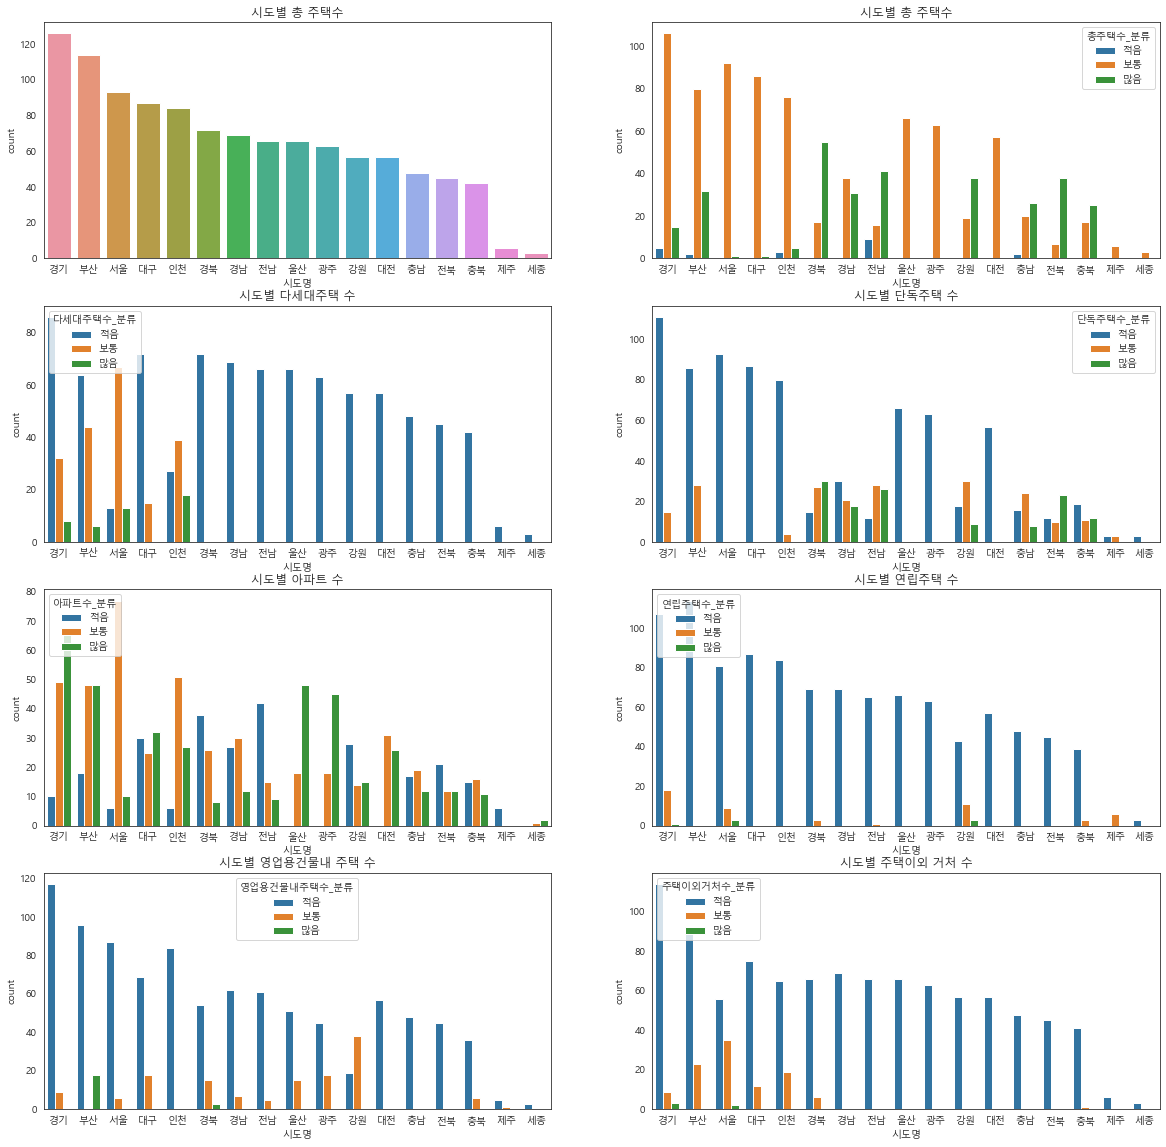

In [35]:
# 시도별 편의시설 비율
flg, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

sns.countplot(x = '시도명', data=result, ax=ax[0,0], order=result['시도명'].value_counts().index).set_title("시도별 총 주택수")
sns.countplot(x = '시도명', hue = '총주택수_분류', data=result, ax=ax[0,1], order=result['시도명'].value_counts().index).set_title("시도별 총 주택수")
sns.countplot(x = '시도명', hue = '다세대주택수_분류', data=result, ax=ax[1,0], order=result['시도명'].value_counts().index).set_title("시도별 다세대주택 수")
sns.countplot(x = '시도명', hue = '단독주택수_분류', data=result, ax=ax[1,1], order=result['시도명'].value_counts().index).set_title("시도별 단독주택 수")
sns.countplot(x = '시도명', hue = '아파트수_분류',  data=result, ax=ax[2,0], order=result['시도명'].value_counts().index).set_title("시도별 아파트 수")
sns.countplot(x = '시도명', hue = '연립주택수_분류',  data=result, ax=ax[2,1], order=result['시도명'].value_counts().index).set_title("시도별 연립주택 수")
sns.countplot(x = '시도명', hue = '영업용건물내주택수_분류',  data=result, ax=ax[3,0], order=result['시도명'].value_counts().index).set_title("시도별 영업용건물내 주택 수")
sns.countplot(x = '시도명', hue = '주택이외거처수_분류',  data=result, ax=ax[3,1], order=result['시도명'].value_counts().index).set_title("시도별 주택이외 거처 수")

- 데이터의 수 자체는 경기, 부산, 서울, 대구, 인천 순으로 많다.
- 총 주택 수가 많은 지역은 경북, 경남, 전북, 전남, 충북, 충남, 강원, 부산으로 수도권이 아닌 지역이다.
- 대부분의 지역에서 다수 분포되어 있는 주택유형은 '아파트'다.
- '다세대주택(빌라)'가 밀집된 지역들(경기, 부산, 서울, 대구, 인천)과 '단독주택'이 밀집된 지역들(경북, 경남, 전남, 강원, 충남, 충북, 제주)이 대비된다.

### 3.2 수치형변수 이상치 확인

In [36]:
df_num.columns

Index(['총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수', '주택이외거처수',
       '총가구수', '평균가구원수', '1세대가구수', '2세대가구수', '3세대가구수', '4세대가구수', '1인가구수',
       '비혈연가구수'],
      dtype='object')

In [37]:
# 이상치 탐색(boxplot)
df_num_tmp = df_num.melt()
df_num_tmp

,variable,value
0,총주택수,156.828508
1,총주택수,147.901408
2,총주택수,147.901408
3,총주택수,154.984375
4,총주택수,154.984375
5,총주택수,165.025510
6,총주택수,162.044872
7,총주택수,163.245714
8,총주택수,165.659091
9,총주택수,159.475410


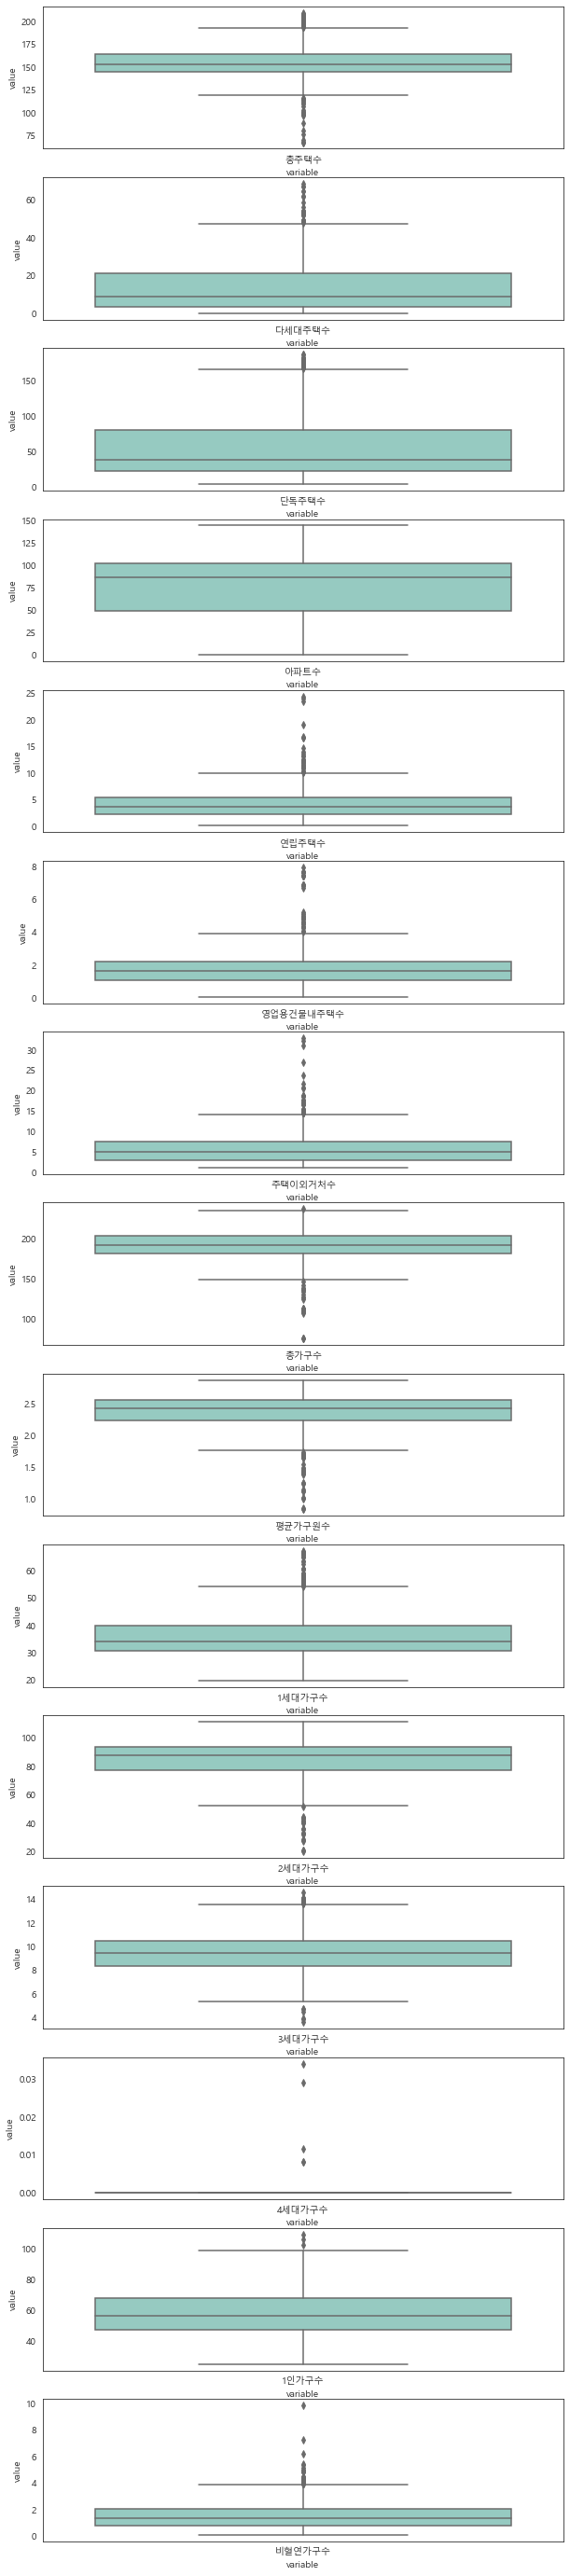

In [38]:
fig, ax = plt.subplots(nrows=df_num_tmp.variable.nunique(), ncols=1, figsize=(10,50))

for i, a in zip(df_num_tmp.variable.unique(), ax):
    sns.boxplot(x='variable', y='value', data=df_num_tmp[df_num_tmp.variable==i], ax=a, palette='Set3');

#### 0값이 많은 환승거리, 환승역개수에 대해 이상치 재탐색
- 0이 아닌 값들로 조건을 걸어 이상치 확인

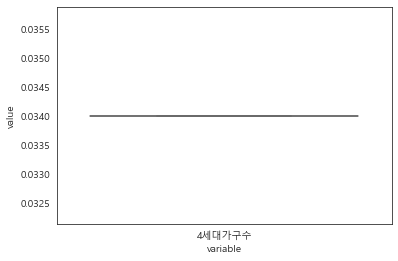

In [39]:
# 환승거리가 1 이상인 값들 추출
df_num_tmp1 = df_num_tmp[df_num_tmp.variable == '4세대가구수']
df_num_tmp1 = df_num_tmp1[df_num_tmp1.value >= 0.03]

# boxplot
sns.boxplot(x='variable', y='value', data=df_num_tmp1,  orient='v', palette='Set3')
plt.show()

In [40]:
# 이상치 탐색 함수 정의

def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    index = np.where((x > upper_bound) | (x < lower_bound))
    return index

In [41]:
# 기본 통계량 확인
df_num[['총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수', '주택이외거처수',
       '총가구수', '평균가구원수', '1세대가구수', '2세대가구수', '3세대가구수', '4세대가구수', '1인가구수',
       '비혈연가구수']].describe().T

,count,mean,std,min,25%,50%,75%,max
총주택수,1098.0,155.043082,19.095855,67.638009,145.117780,152.932935,164.280833,209.066038
다세대주택수,1098.0,13.987434,13.619143,0.072398,3.486287,8.910326,21.056277,68.699143
단독주택수,1098.0,56.982931,45.777010,4.000000,22.284678,38.225428,79.768885,186.133333
아파트수,1098.0,77.331048,34.138991,0.054299,49.142857,86.886076,102.085691,144.511905
연립주택수,1098.0,4.196678,2.671238,0.054299,2.330913,3.682456,5.406678,24.369565
영업용건물내주택수,1098.0,1.819948,1.218401,0.059524,1.047297,1.632797,2.211560,7.952381
주택이외거처수,1098.0,6.033592,4.059828,1.230769,3.027027,5.145198,7.519679,32.833333
총가구수,1098.0,191.136861,18.895929,74.778281,181.237749,191.880918,203.629444,237.664959
평균가구원수,1098.0,2.372469,0.270440,0.835747,2.234831,2.427390,2.552381,2.865735
1세대가구수,1098.0,36.515713,8.787605,19.669683,30.459519,34.141343,40.020589,67.462264


#### 수치형 변수 분포 확인

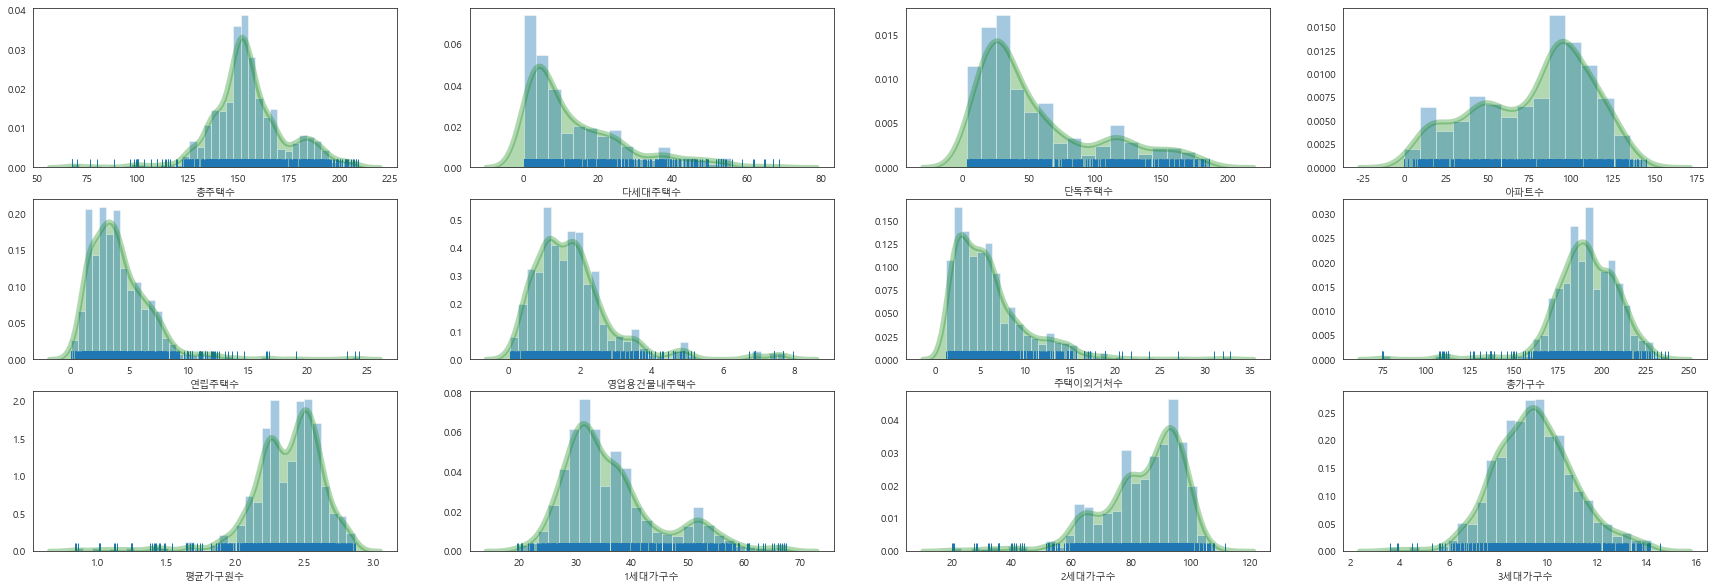

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize = (30,10))

p=0
for i in range(3):
    for j in range(4):
        sns.distplot(df_num.iloc[:,p], hist=True, kde=True, rug=True, ax=ax[i,j],
                    kde_kws={'color':'g', 'alpha':0.3, 'linewidth':5, 'shade':True})
        p += 1;

#### 로그 변환

In [43]:
df_num = np.log(df_num+1)

#### 수치형 변수 분포 재확인

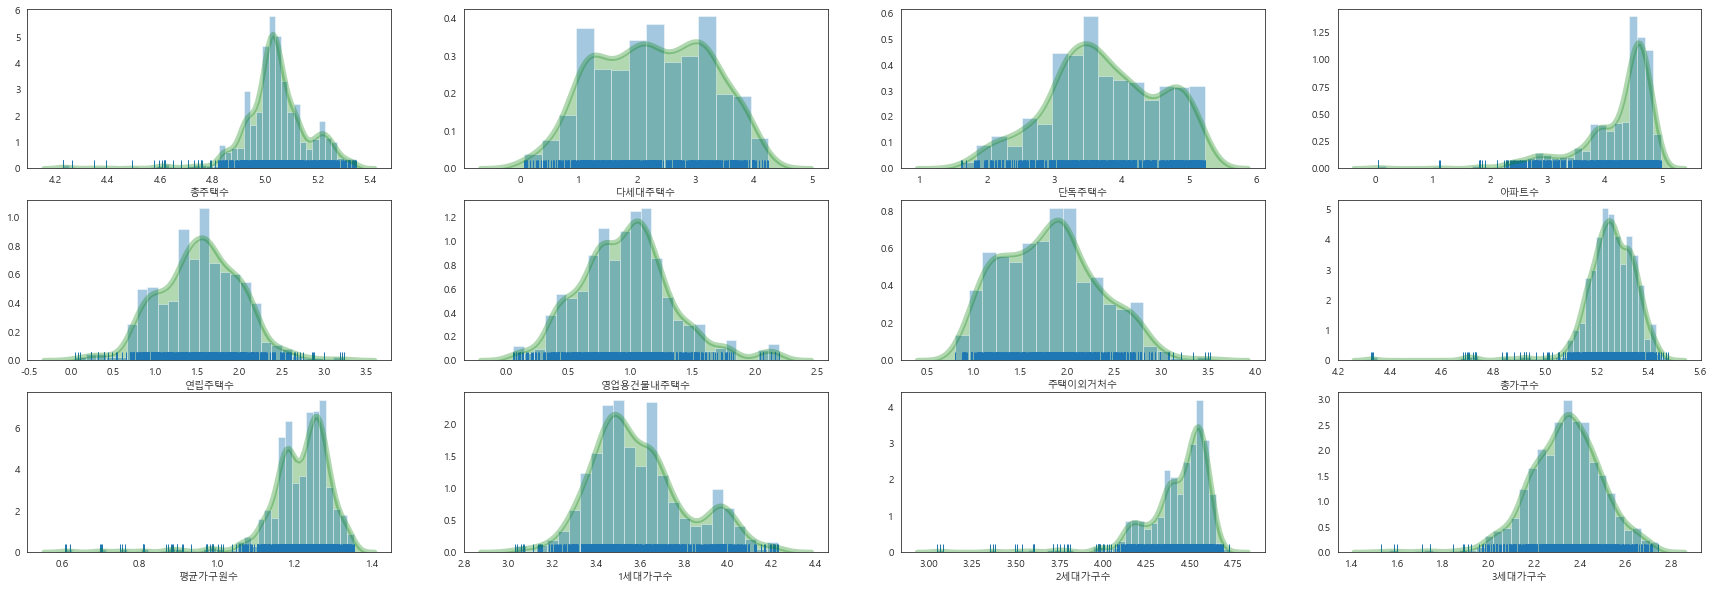

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize = (30,10))

p=0
for i in range(3):
    for j in range(4):
        sns.distplot(df_num.iloc[:,p], hist=True, kde=True, rug=True, ax=ax[i,j],
                    kde_kws={'color':'g', 'alpha':0.3, 'linewidth':5, 'shade':True})
        p += 1;

#### Rescaling: Min-Max Scaling

In [45]:
# Min-Max Scaling

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
df_num_final = minmax_scale.fit_transform(df_num)
df_num_final = pd.DataFrame(df_num_final)
df_num_final.columns = df_num.columns
df_num_final

,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수,총가구수,평균가구원수,1세대가구수,2세대가구수,3세대가구수,4세대가구수,1인가구수,비혈연가구수
0,0.744396,0.237932,0.693886,0.895505,0.529308,0.583904,0.169490,0.822189,0.780347,0.531799,0.807920,0.737819,0.0,0.614991,0.240896
1,0.692343,0.147614,0.871112,0.657302,0.084703,0.678423,0.330460,0.726668,0.513149,0.512148,0.555023,0.739022,0.0,0.702353,0.326854
2,0.692343,0.147614,0.871112,0.657302,0.084703,0.678423,0.330460,0.728576,0.612932,0.592167,0.642719,0.704052,0.0,0.577661,0.386496
3,0.733888,0.442642,0.863782,0.688881,0.416140,0.406636,0.365786,0.726668,0.513149,0.512148,0.555023,0.739022,0.0,0.702353,0.326854
4,0.733888,0.442642,0.863782,0.688881,0.416140,0.406636,0.365786,0.728576,0.612932,0.592167,0.642719,0.704052,0.0,0.577661,0.386496
5,0.789661,0.367344,0.648882,0.927000,0.595397,0.564686,0.167254,0.770527,0.794153,0.551591,0.820578,0.623045,0.0,0.462150,0.266836
6,0.773465,0.340829,0.776057,0.847569,0.594880,0.478597,0.209415,0.782445,0.696054,0.580591,0.703582,0.620507,0.0,0.637032,0.501650
7,0.780025,0.250513,0.621843,0.937749,0.574757,0.551826,0.381652,0.790258,0.784500,0.502394,0.805358,0.695789,0.0,0.548887,0.426552
8,0.793066,0.324702,0.841965,0.766282,0.667764,0.735503,0.400948,0.883930,0.782894,0.563517,0.770998,0.873549,0.0,0.742940,0.581007
9,0.759264,0.261656,0.859018,0.706592,0.631953,0.796872,0.383442,0.768980,0.624603,0.660199,0.663719,0.766179,0.0,0.595139,0.401010


### 3.3 상관관계 확인

In [46]:
df_corr = result.corr()

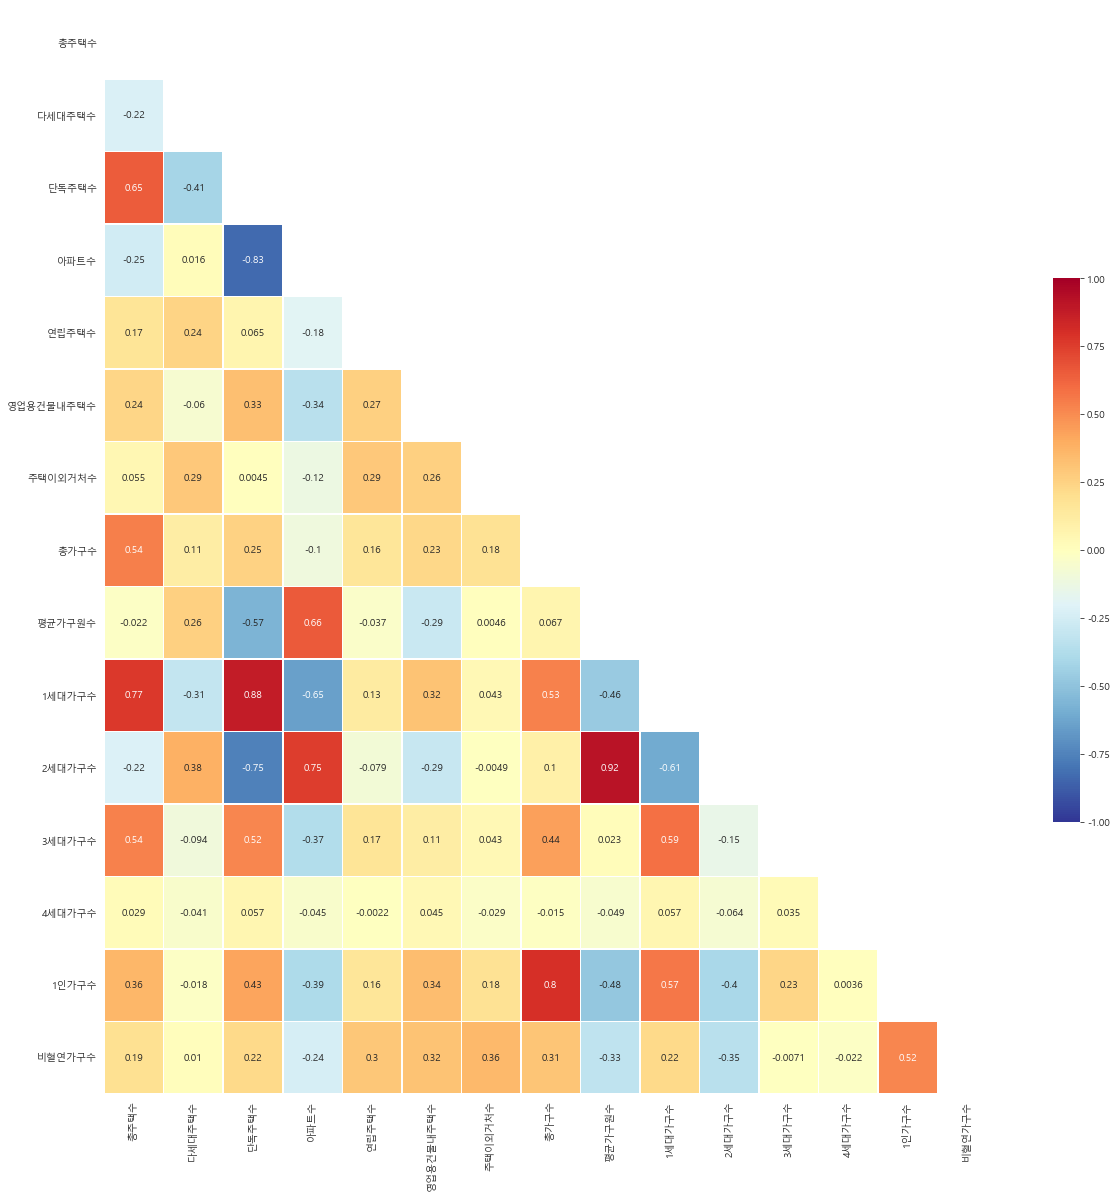

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

- 1세대가구수와 단독주택수(0.88), 1세대가구수와 총주택수(0.77)의 상관관계가 높다.
- 2세대가구수와 평균가구원수(0.92), 2세대가구수와 아파트수(0.75)의 상관관계가 높다.
- 1인가구수와 총가구수의 상관관계가 높다.(0.8)

- 단독주택수와 2세대가구수(-0.75), 단독주택수와 아파트수(-0.83)이 높은 음의 상관관계를 가짐

#### 상관관계가 높게 나온 변수들의 관계를 산점도를 통해 확인

- 세대별 가구 수에 따른 변수간 관계 확인

Text(0.5, 1.0, '1세대가구수와 단독주택수')

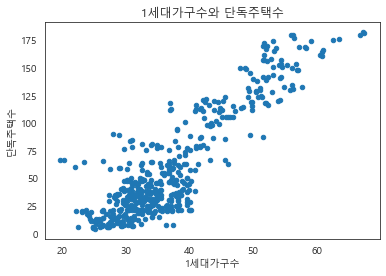

In [48]:
result[result['1세대가구수'] < 500].sample(500).plot.scatter(x='1세대가구수', y='단독주택수').set_title("1세대가구수와 단독주택수")

Text(0.5, 1.0, '1세대가구수와 총주택수')

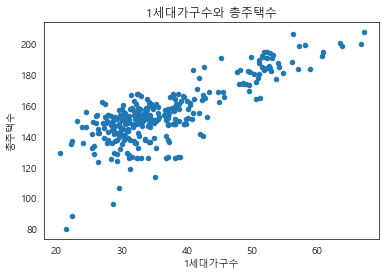

In [49]:
result[result['1세대가구수'] < 300].sample(300).plot.scatter(x='1세대가구수', y='총주택수').set_title("1세대가구수와 총주택수")

Text(0.5, 1.0, '2세대가구수와 평균가구원수')

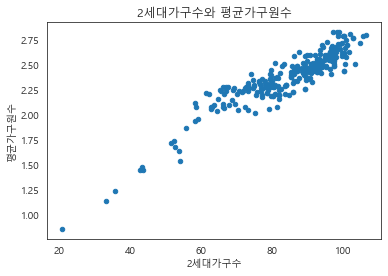

In [50]:
result[result['2세대가구수'] < 300].sample(300).plot.scatter(x='2세대가구수', y='평균가구원수').set_title("2세대가구수와 평균가구원수")

Text(0.5, 1.0, '2세대가구수와 아파트수')

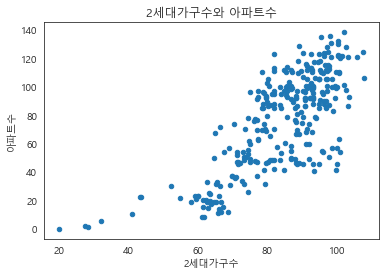

In [51]:
result[result['2세대가구수'] < 300].sample(300).plot.scatter(x='2세대가구수', y='아파트수').set_title("2세대가구수와 아파트수")

Text(0.5, 1.0, '1인가구수와 총가구수')

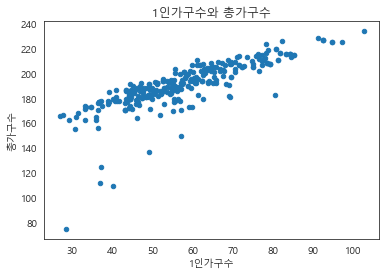

In [52]:
result[result['1인가구수'] < 300].sample(300).plot.scatter(x='1인가구수', y='총가구수').set_title("1인가구수와 총가구수")

Text(0.5, 1.0, '2세대가구수와 단독주택')

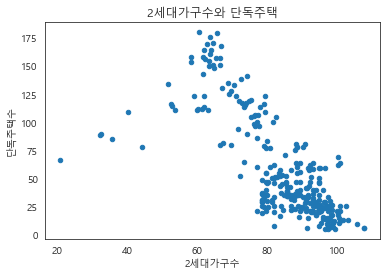

In [53]:
result[result['2세대가구수'] < 300].sample(300).plot.scatter(x='2세대가구수', y='단독주택수').set_title("2세대가구수와 단독주택")

Text(0.5, 1.0, '단독주택과 아파트 수')

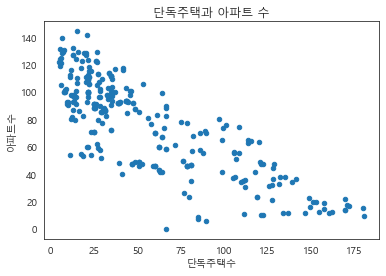

In [54]:
result[result['단독주택수'] < 300].sample(300).plot.scatter(x='단독주택수', y='아파트수').set_title("단독주택과 아파트 수")

### 목표변수 이분범주화

In [55]:
merge15.columns

Index(['시도명', '시군구명', '총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수',
       '주택이외거처수', '총가구수', '평균가구원수', '1세대가구수', '2세대가구수', '3세대가구수', '4세대가구수',
       '1인가구수', '비혈연가구수', '기준년'],
      dtype='object')

In [56]:
# 컬럼명 변경
merge15.columns = ['시도명', '시군구명', 
                   '총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수',
       '주택이외거처수', '총가구수', '평균가구원수', '일세대가구수', '이세대가구수', '삼세대가구수', '사세대가구수',
       '일인가구수', '비혈연가구수', '기준년']
merge15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 18 columns):
시도명          366 non-null object
시군구명         366 non-null object
총주택수         366 non-null float64
다세대주택수       366 non-null float64
단독주택수        366 non-null float64
아파트수         366 non-null float64
연립주택수        366 non-null float64
영업용건물내주택수    366 non-null float64
주택이외거처수      366 non-null float64
총가구수         366 non-null float64
평균가구원수       366 non-null float64
일세대가구수       366 non-null float64
이세대가구수       366 non-null float64
삼세대가구수       366 non-null float64
사세대가구수       366 non-null float64
일인가구수        366 non-null float64
비혈연가구수       366 non-null float64
기준년          366 non-null object
dtypes: float64(15), object(3)
memory usage: 54.3+ KB


In [57]:
# 컬럼명 변경
merge16.columns = ['시도명_x', '시군구명_x', 
                   '총주택수_x', '다세대주택수_x', '단독주택수_x', '아파트수_x', '연립주택수_x', '영업용건물내주택수_x',
       '주택이외거처수_x', '총가구수_x', '평균가구원수_x', '일세대가구수_x', '이세대가구수_x', '삼세대가구수_x', '사세대가구수_x',
       '일인가구수_x', '비혈연가구수_x', '기준년']
merge16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 18 columns):
시도명_x          366 non-null object
시군구명_x         366 non-null object
총주택수_x         366 non-null float64
다세대주택수_x       366 non-null float64
단독주택수_x        366 non-null float64
아파트수_x         366 non-null float64
연립주택수_x        366 non-null float64
영업용건물내주택수_x    366 non-null float64
주택이외거처수_x      366 non-null float64
총가구수_x         366 non-null float64
평균가구원수_x       366 non-null float64
일세대가구수_x       366 non-null float64
이세대가구수_x       366 non-null float64
삼세대가구수_x       366 non-null float64
사세대가구수_x       366 non-null float64
일인가구수_x        366 non-null float64
비혈연가구수_x       366 non-null float64
기준년            366 non-null object
dtypes: float64(15), object(3)
memory usage: 54.3+ KB


In [58]:
# 컬럼명 변경
merge17.columns = ['시도명_y', '시군구명_y', 
                   '총주택수_y', '다세대주택수_y', '단독주택수_y', '아파트수_y', '연립주택수_y', '영업용건물내주택수_y',
       '주택이외거처수_y', '총가구수_y', '평균가구원수_y', '일세대가구수_y', '이세대가구수_y', '삼세대가구수_y', '사세대가구수_y',
       '일인가구수_y', '비혈연가구수_y', '기준년']
merge17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 18 columns):
시도명_y          366 non-null object
시군구명_y         366 non-null object
총주택수_y         366 non-null float64
다세대주택수_y       366 non-null float64
단독주택수_y        366 non-null float64
아파트수_y         366 non-null float64
연립주택수_y        366 non-null float64
영업용건물내주택수_y    366 non-null float64
주택이외거처수_y      366 non-null float64
총가구수_y         366 non-null float64
평균가구원수_y       366 non-null float64
일세대가구수_y       366 non-null float64
이세대가구수_y       366 non-null float64
삼세대가구수_y       366 non-null float64
사세대가구수_y       366 non-null float64
일인가구수_y        366 non-null float64
비혈연가구수_y       366 non-null float64
기준년            366 non-null object
dtypes: float64(15), object(3)
memory usage: 54.3+ KB


In [59]:
df = pd.concat([merge15, merge16, merge17], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 54 columns):
시도명            366 non-null object
시군구명           366 non-null object
총주택수           366 non-null float64
다세대주택수         366 non-null float64
단독주택수          366 non-null float64
아파트수           366 non-null float64
연립주택수          366 non-null float64
영업용건물내주택수      366 non-null float64
주택이외거처수        366 non-null float64
총가구수           366 non-null float64
평균가구원수         366 non-null float64
일세대가구수         366 non-null float64
이세대가구수         366 non-null float64
삼세대가구수         366 non-null float64
사세대가구수         366 non-null float64
일인가구수          366 non-null float64
비혈연가구수         366 non-null float64
기준년            366 non-null object
시도명_x          366 non-null object
시군구명_x         366 non-null object
총주택수_x         366 non-null float64
다세대주택수_x       366 non-null float64
단독주택수_x        366 non-null float64
아파트수_x         366 non-null float64
연립주택수_x        366 non-null float64


In [60]:
df_target = df[['시도명','시군구명','총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수',
       '영업용건물내주택수', '주택이외거처수','총가구수', '평균가구원수', '일세대가구수', '이세대가구수', '삼세대가구수', '사세대가구수',
       '일인가구수', '비혈연가구수',
                    '총주택수_x', '다세대주택수_x', '단독주택수_x', '아파트수_x', '연립주택수_x', '영업용건물내주택수_x',
       '주택이외거처수_x','총가구수_x', '평균가구원수_x', '일세대가구수_x',
       '이세대가구수_x', '삼세대가구수_x', '사세대가구수_x', '일인가구수_x','비혈연가구수_x',
                    '총주택수_y', '다세대주택수_y', '단독주택수_y', '아파트수_y', '연립주택수_y', '영업용건물내주택수_y',
       '주택이외거처수_y','총가구수_y', '평균가구원수_y', '일세대가구수_y',
       '이세대가구수_y', '삼세대가구수_y', '사세대가구수_y', '일인가구수_y', '비혈연가구수_y']]
df_target

,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수,총가구수,...,영업용건물내주택수_y,주택이외거처수_y,총가구수_y,평균가구원수_y,일세대가구수_y,이세대가구수_y,삼세대가구수_y,사세대가구수_y,일인가구수_y,비혈연가구수_y
0,강원,강릉시,156.828508,1.895323,60.741648,85.953229,4.677060,2.683742,2.536748,193.623608,...,2.708241,3.547884,200.164811,2.264365,40.198218,79.100223,9.191537,0.0,67.979955,1.844098
1,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.422535,...,3.929577,6.084507,171.267606,1.683099,37.774648,52.732394,9.183099,0.0,67.901408,2.169014
2,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.804688,...,3.929577,6.084507,173.250000,1.899219,42.062500,59.531250,8.414062,0.0,59.875000,1.687500
3,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.422535,...,1.703125,5.226562,171.267606,1.683099,37.774648,52.732394,9.183099,0.0,67.901408,2.169014
4,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.804688,...,1.703125,5.226562,173.250000,1.899219,42.062500,59.531250,8.414062,0.0,59.875000,1.687500
5,강원,동해시,165.025510,3.969388,51.454082,100.551020,6.005102,2.535714,2.515306,182.423469,...,2.729592,3.142857,183.448980,2.342347,40.448980,79.857143,7.969388,0.0,51.719388,1.867347
6,강원,삼척시,162.044872,3.448718,82.147436,67.660256,5.993590,1.942308,2.942308,184.948718,...,2.493590,3.262821,184.794872,2.013462,41.673077,64.782051,7.121795,0.0,66.942308,2.621795
7,강원,속초시,163.245714,2.051429,46.560000,106.074286,5.560000,2.440000,5.297143,186.622857,...,2.600000,5.302857,189.205714,2.268000,39.142857,78.622857,8.228571,0.0,58.445714,2.948571
8,강원,양구군,165.659091,3.159091,104.568182,45.000000,7.818182,4.090909,5.636364,207.909091,...,4.250000,5.704545,201.568182,2.290909,43.818182,74.500000,11.068182,0.0,66.090909,4.159091
9,강원,양양군,159.475410,2.196721,111.295082,33.278689,6.868852,4.803279,5.327869,182.098361,...,5.016393,6.459016,186.196721,1.919672,46.344262,61.229508,10.475410,0.0,64.032787,2.377049


In [61]:
df.columns

Index(['시도명', '시군구명', '총주택수', '다세대주택수', '단독주택수', '아파트수', '연립주택수', '영업용건물내주택수',
       '주택이외거처수', '총가구수', '평균가구원수', '일세대가구수', '이세대가구수', '삼세대가구수', '사세대가구수',
       '일인가구수', '비혈연가구수', '기준년', '시도명_x', '시군구명_x', '총주택수_x', '다세대주택수_x',
       '단독주택수_x', '아파트수_x', '연립주택수_x', '영업용건물내주택수_x', '주택이외거처수_x', '총가구수_x',
       '평균가구원수_x', '일세대가구수_x', '이세대가구수_x', '삼세대가구수_x', '사세대가구수_x', '일인가구수_x',
       '비혈연가구수_x', '기준년', '시도명_y', '시군구명_y', '총주택수_y', '다세대주택수_y', '단독주택수_y',
       '아파트수_y', '연립주택수_y', '영업용건물내주택수_y', '주택이외거처수_y', '총가구수_y', '평균가구원수_y',
       '일세대가구수_y', '이세대가구수_y', '삼세대가구수_y', '사세대가구수_y', '일인가구수_y', '비혈연가구수_y',
       '기준년'],
      dtype='object')

### 2015 vs 2016(1년 후)

In [62]:
df_target['총주택수_1년'] = np.where(df_target.총주택수 < df_target.총주택수_x, 1, 0)

df_target['다세대주택수_1년'] = np.where(df_target.다세대주택수 < df_target.다세대주택수_x, 1, 0)

df_target['단독주택수_1년'] = np.where(df_target.단독주택수 < df_target.단독주택수_x, 1, 0)

df_target['아파트수_1년'] = np.where(df_target.아파트수 < df_target.아파트수_x, 1, 0)

df_target['연립주택수_1년'] = np.where(df_target.연립주택수 < df_target.연립주택수_x, 1, 0)

df_target['영업용건물내주택수_1년'] = np.where(df_target.영업용건물내주택수< df_target.영업용건물내주택수_x, 1, 0)

df_target['주택이외거처수_1년'] = np.where(df_target.주택이외거처수 < df_target.주택이외거처수_x, 1, 0)


df_target['총가구수_1년'] = np.where(df_target.총가구수 < df_target.총가구수_x, 1, 0)

df_target['1세대가구수_1년'] = np.where(df_target.일세대가구수 < df_target.일세대가구수_x, 1, 0)

df_target['2세대가구수_1년'] = np.where(df_target.이세대가구수 < df_target.이세대가구수_x, 1, 0)

df_target['3세대가구수_1년'] = np.where(df_target.삼세대가구수 < df_target.삼세대가구수_x, 1, 0)

df_target['4세대가구수_1년'] = np.where(df_target.사세대가구수 < df_target.사세대가구수_x, 1, 0)

df_target['1인가구수_1년'] = np.where(df_target.일인가구수< df_target.일인가구수_x, 1, 0)

df_target['비혈연가구수_1년'] = np.where(df_target.비혈연가구수 < df_target.비혈연가구수_x, 1, 0)

df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 61 columns):
시도명             366 non-null object
시군구명            366 non-null object
총주택수            366 non-null float64
다세대주택수          366 non-null float64
단독주택수           366 non-null float64
아파트수            366 non-null float64
연립주택수           366 non-null float64
영업용건물내주택수       366 non-null float64
주택이외거처수         366 non-null float64
총가구수            366 non-null float64
평균가구원수          366 non-null float64
일세대가구수          366 non-null float64
이세대가구수          366 non-null float64
삼세대가구수          366 non-null float64
사세대가구수          366 non-null float64
일인가구수           366 non-null float64
비혈연가구수          366 non-null float64
총주택수_x          366 non-null float64
다세대주택수_x        366 non-null float64
단독주택수_x         366 non-null float64
아파트수_x          366 non-null float64
연립주택수_x         366 non-null float64
영업용건물내주택수_x     366 non-null float64
주택이외거처수_x       366 non-null float64
총가구수_x   

### 2015 vs 2017 (2년 후)

In [63]:
df_target['총주택수_2년'] = np.where(df_target.총주택수_x < df_target.총주택수_y, 1, 0)

df_target['다세대주택수_2년'] = np.where(df_target.다세대주택수_x < df_target.다세대주택수_y, 1, 0)

df_target['단독주택수_2년'] = np.where(df_target.단독주택수_x < df_target.단독주택수_y, 1, 0)

df_target['아파트수_2년'] = np.where(df_target.아파트수_x < df_target.아파트수_y, 1, 0)

df_target['연립주택수_2년'] = np.where(df_target.연립주택수_x < df_target.연립주택수_y, 1, 0)

df_target['영업용건물내주택수_2년'] = np.where(df_target.영업용건물내주택수_x< df_target.영업용건물내주택수_y, 1, 0)

df_target['주택이외거처수_2년'] = np.where(df_target.주택이외거처수_x < df_target.주택이외거처수_y, 1, 0)

df_target['총가구수_2년'] = np.where(df_target.총가구수_x < df_target.총가구수_y, 1, 0)

df_target['1세대가구수_2년'] = np.where(df_target.일세대가구수_x < df_target.일세대가구수_y, 1, 0)

df_target['2세대가구수_2년'] = np.where(df_target.이세대가구수_x < df_target.이세대가구수_y, 1, 0)

df_target['3세대가구수_2년'] = np.where(df_target.삼세대가구수_x < df_target.삼세대가구수_y, 1, 0)

df_target['4세대가구수_2년'] = np.where(df_target.사세대가구수_x < df_target.사세대가구수_y, 1, 0)

df_target['1인가구수_2년'] = np.where(df_target.일인가구수_x < df_target.일인가구수_y, 1, 0)

df_target['비혈연가구수_2년'] = np.where(df_target.비혈연가구수_x < df_target.비혈연가구수_y, 1, 0)

df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 75 columns):
시도명             366 non-null object
시군구명            366 non-null object
총주택수            366 non-null float64
다세대주택수          366 non-null float64
단독주택수           366 non-null float64
아파트수            366 non-null float64
연립주택수           366 non-null float64
영업용건물내주택수       366 non-null float64
주택이외거처수         366 non-null float64
총가구수            366 non-null float64
평균가구원수          366 non-null float64
일세대가구수          366 non-null float64
이세대가구수          366 non-null float64
삼세대가구수          366 non-null float64
사세대가구수          366 non-null float64
일인가구수           366 non-null float64
비혈연가구수          366 non-null float64
총주택수_x          366 non-null float64
다세대주택수_x        366 non-null float64
단독주택수_x         366 non-null float64
아파트수_x          366 non-null float64
연립주택수_x         366 non-null float64
영업용건물내주택수_x     366 non-null float64
주택이외거처수_x       366 non-null float64
총가구수_x   

In [64]:
df_target

,시도명,시군구명,총주택수,다세대주택수,단독주택수,아파트수,연립주택수,영업용건물내주택수,주택이외거처수,총가구수,...,연립주택수_2년,영업용건물내주택수_2년,주택이외거처수_2년,총가구수_2년,1세대가구수_2년,2세대가구수_2년,3세대가구수_2년,4세대가구수_2년,1인가구수_2년,비혈연가구수_2년
0,강원,강릉시,156.828508,1.895323,60.741648,85.953229,4.677060,2.683742,2.536748,193.623608,...,0,1,1,1,1,0,0,0,1,1
1,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.422535,...,0,1,1,0,1,1,0,0,0,1
2,강원,고성군,147.901408,0.985915,116.323944,25.887324,0.380282,3.507042,4.478873,173.804688,...,0,1,1,1,1,0,0,0,1,1
3,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.422535,...,0,0,1,0,1,1,0,0,0,1
4,경남,고성군,154.984375,5.804688,113.250000,30.414062,2.960938,1.523438,5.031250,173.804688,...,0,0,1,1,1,0,0,0,1,1
5,강원,동해시,165.025510,3.969388,51.454082,100.551020,6.005102,2.535714,2.515306,182.423469,...,0,1,1,0,1,0,0,0,1,1
6,강원,삼척시,162.044872,3.448718,82.147436,67.660256,5.993590,1.942308,2.942308,184.948718,...,0,1,1,0,1,0,0,0,0,0
7,강원,속초시,163.245714,2.051429,46.560000,106.074286,5.560000,2.440000,5.297143,186.622857,...,0,1,1,1,1,0,0,0,1,1
8,강원,양구군,165.659091,3.159091,104.568182,45.000000,7.818182,4.090909,5.636364,207.909091,...,0,1,1,0,1,0,0,0,0,0
9,강원,양양군,159.475410,2.196721,111.295082,33.278689,6.868852,4.803279,5.327869,182.098361,...,0,1,1,1,1,0,1,0,1,1


### 1년후, 2년후 주택시장 변화 시각화

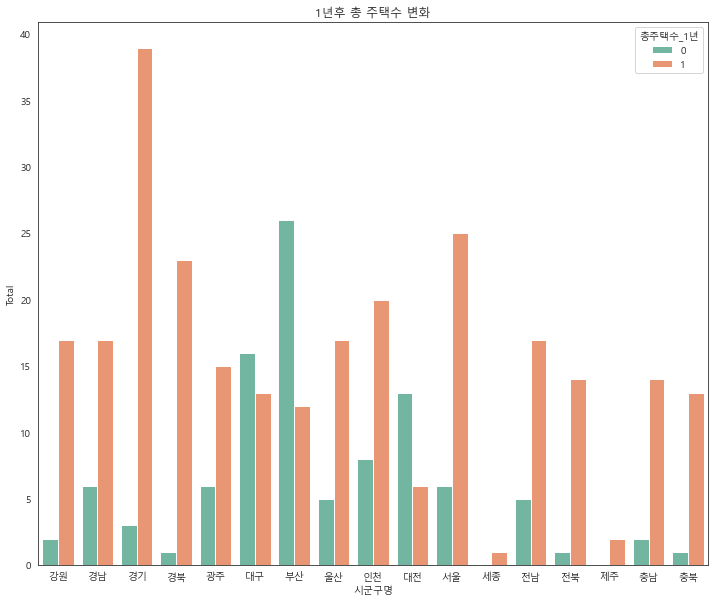

In [65]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '총주택수_1년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 총 주택수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

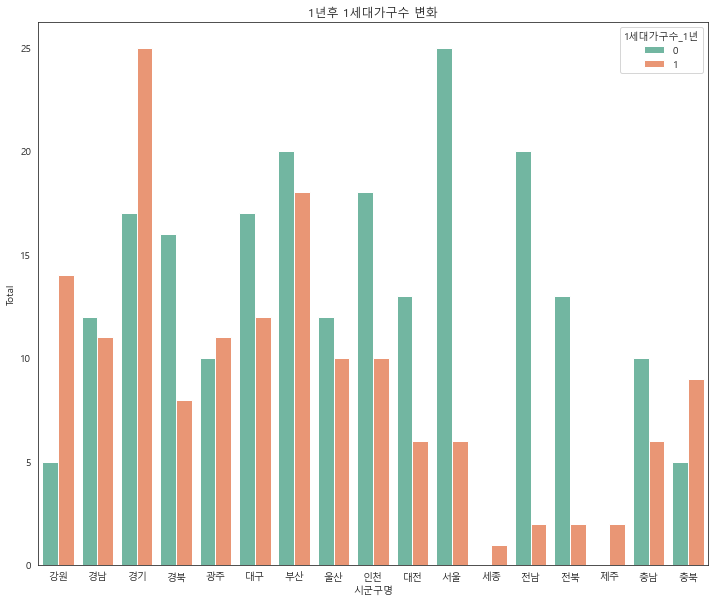

In [66]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '1세대가구수_1년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 1세대가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

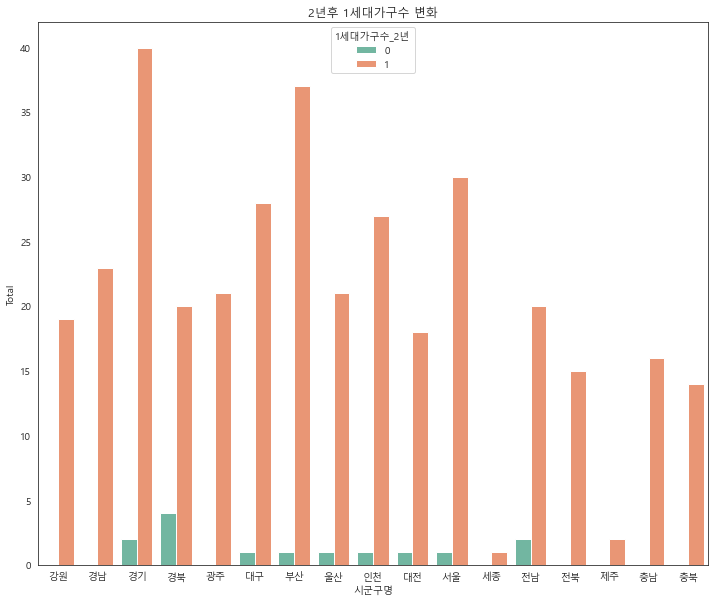

In [67]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '1세대가구수_2년', palette = 'Set2', data = df_target)
ax.set(title = '2년후 1세대가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

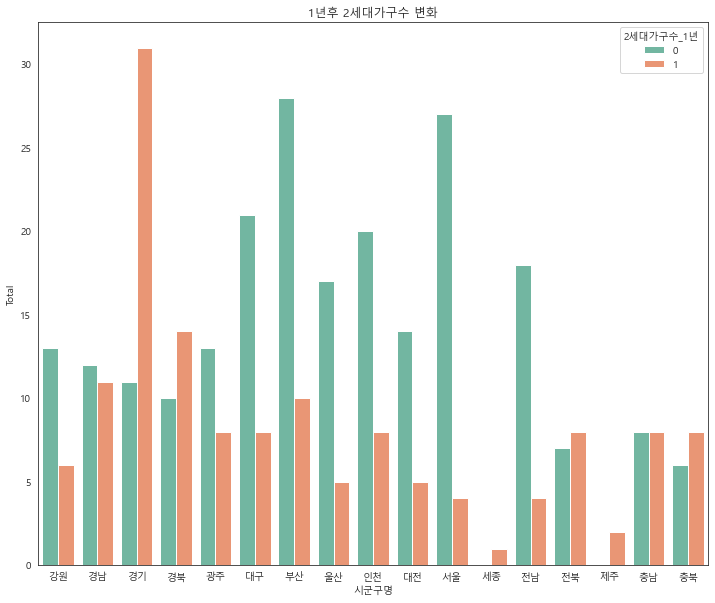

In [68]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '2세대가구수_1년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 2세대가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

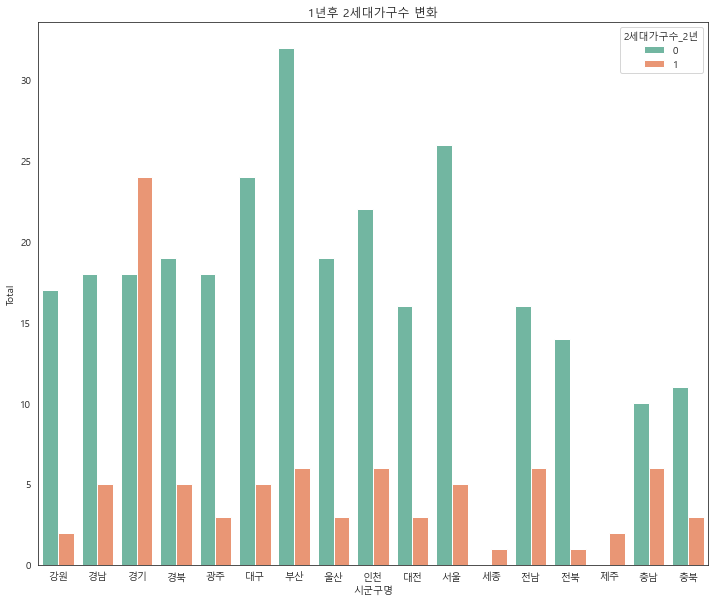

In [69]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '2세대가구수_2년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 2세대가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

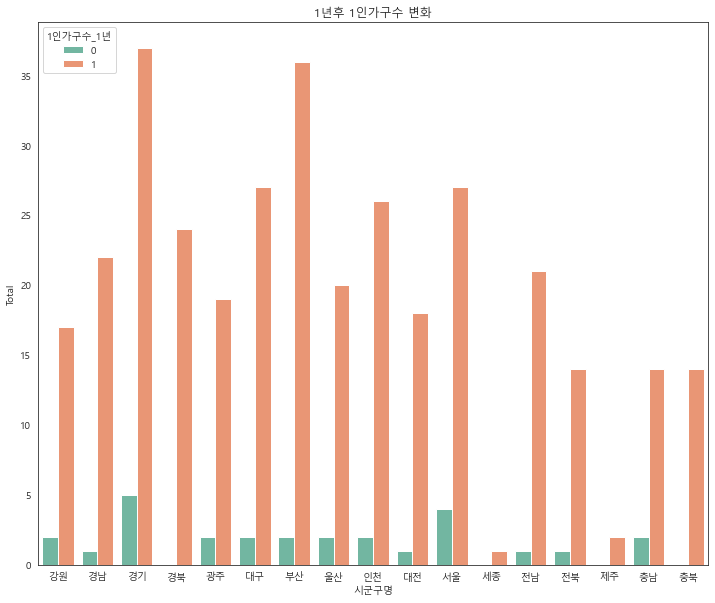

In [70]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '1인가구수_1년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 1인가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

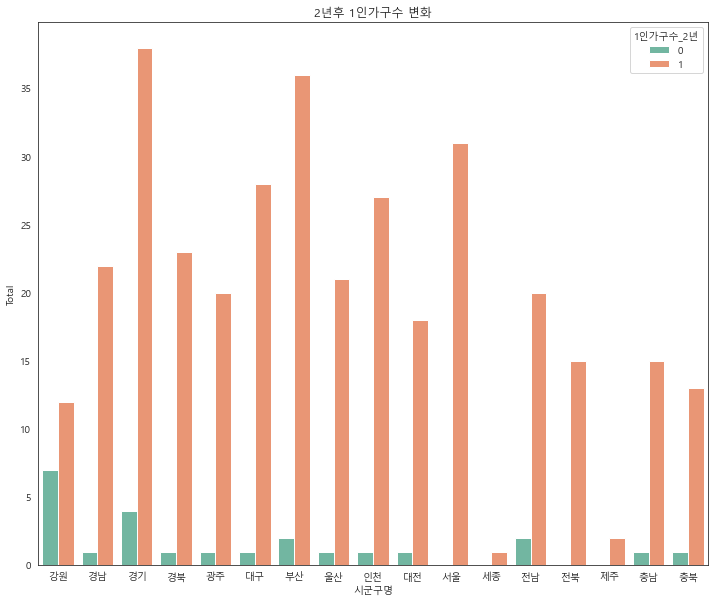

In [71]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '1인가구수_2년', palette = 'Set2', data = df_target)
ax.set(title = '2년후 1인가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

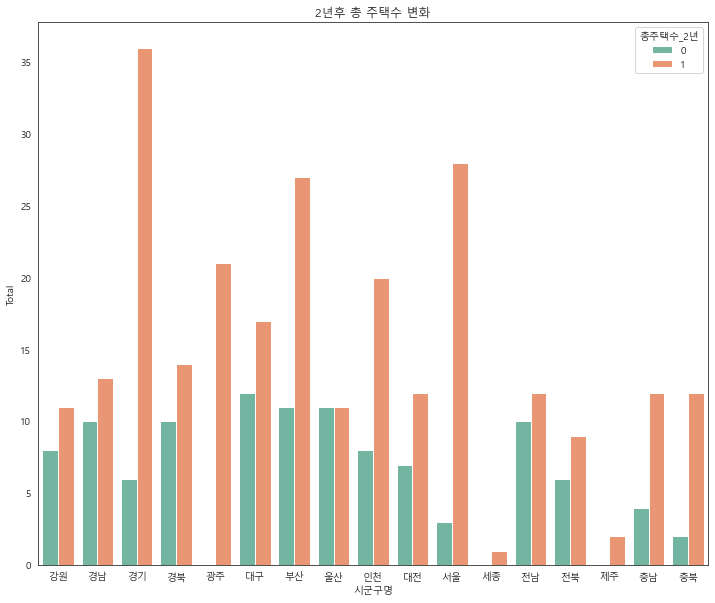

In [72]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '총주택수_2년', palette = 'Set2', data = df_target)
ax.set(title = '2년후 총 주택수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

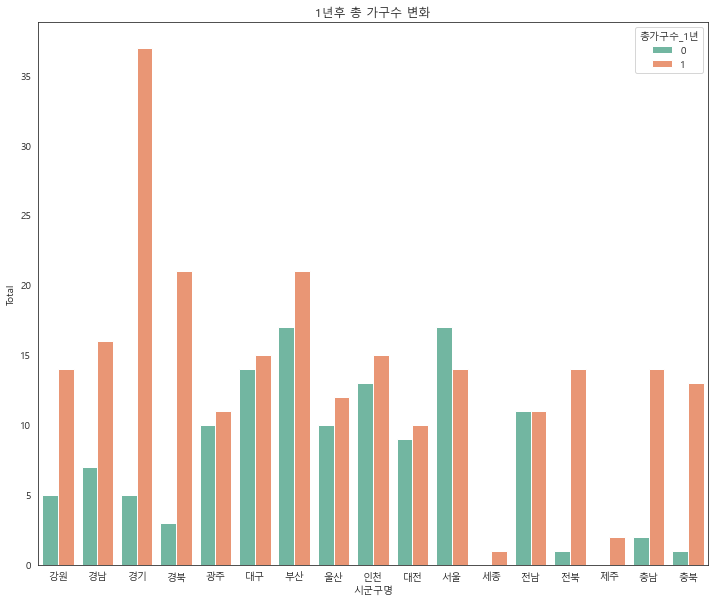

In [73]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '총가구수_1년', palette = 'Set2', data = df_target)
ax.set(title = '1년후 총 가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()

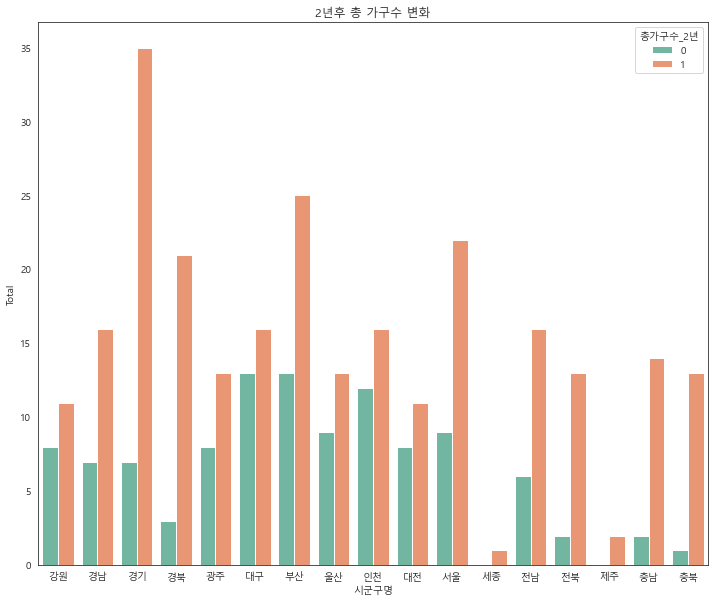

In [74]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = '시도명', hue = '총가구수_2년', palette = 'Set2', data = df_target)
ax.set(title = '2년후 총 가구수 변화', 
       xlabel = '시군구명', ylabel = 'Total')
plt.show()